In [2]:
#回归
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'f(x)')

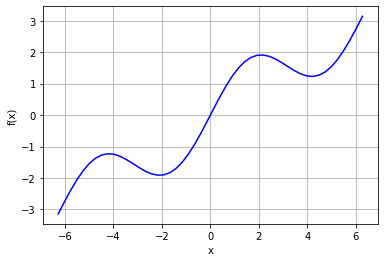

In [3]:
def f(x):
    return np.sin(x)+ 0.5*x

x=np.linspace(-2 * np.pi, 2*np.pi,50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

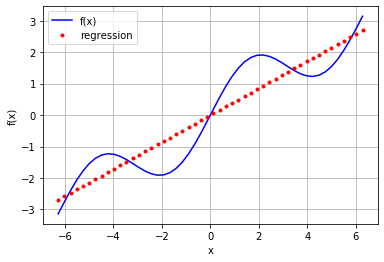

In [4]:
#作为基函数的单项式
reg = np.polyfit(x,f(x),deg=1)
ry = np.polyval(reg,x)

plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

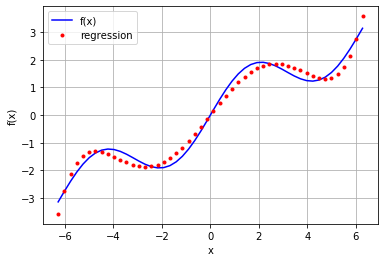

In [6]:
reg=np.polyfit(x,f(x),deg=5)
ry = np.polyval(reg,x)

plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

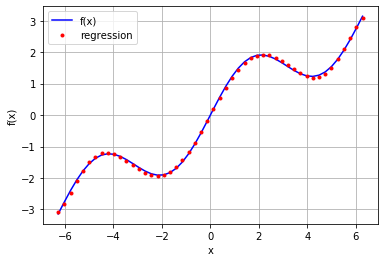

In [7]:
reg = np.polyfit(x,f(x),7)
ry = np.polyval(reg,x)

plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [8]:
#单独的基函数
matrix=np.zeros((3+1,len(x)))
matrix[3,:] = x**3
matrix[2,:] = x**2
matrix[1,:] = x
matrix[0,:] = 0
reg=np.linalg.lstsq(matrix.T, f(x))[0]
reg

D:\Python\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([ 0.00000000e+00,  5.62777448e-01, -1.40367625e-16, -5.43553615e-03])

Text(0, 0.5, 'f(x)')

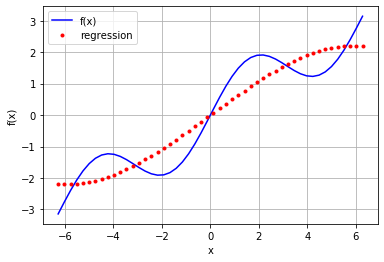

In [9]:
ry = np.dot(reg,matrix)
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x, ry,'r.',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
#有噪声的数据
xn=np.linspace(-2*np.pi, 2*np.pi,50)
xn=xn+0.15*np.random.standard_normal(len(xn))
yn = f(xn)+0.25*np.random.standard_normal(len(xn))

Text(0, 0.5, 'f(x)')

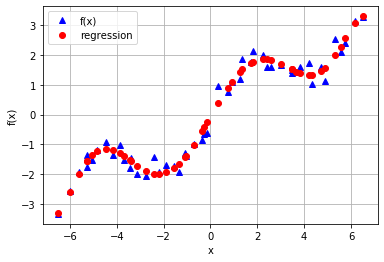

In [15]:
reg = np.polyfit(xn,yn,7)
ry = np.polyval(reg,xn)
plt.plot(xn,yn,'b^', label='f(x)')
plt.plot(xn,ry,'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [16]:
#未排序数据
xu = np.random.rand(50)*4*np.pi - 2*np.pi
yu=f(xu)
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 0.3   0.61  1.68  3.68 -0.62 -1.43 -1.14 -3.7   4.21  0.31]
[ 0.44  0.87  1.83  1.33 -0.89 -1.71 -1.48 -1.32  1.23  0.46]


Text(0, 0.5, 'f(x)')

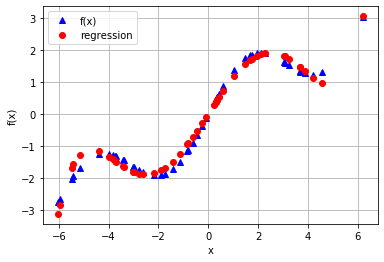

In [17]:
reg = np.polyfit(xu,yu,5)
ry = np.polyval(reg,xu)
plt.plot(xu,yu, 'b^',label='f(x)')
plt.plot(xu,ry, 'ro',label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [50]:
#多维
def fm(x,y):
    return np.sin(x)+0.25*x + np.sqrt(y)+0.05*y**2

x=np.linspace(0,10,20)
y=np.linspace(0,10,20)
X,Y = np.meshgrid(x,y)
Z=fm(X,Y)
x=X.flatten()
y = Y.flatten()


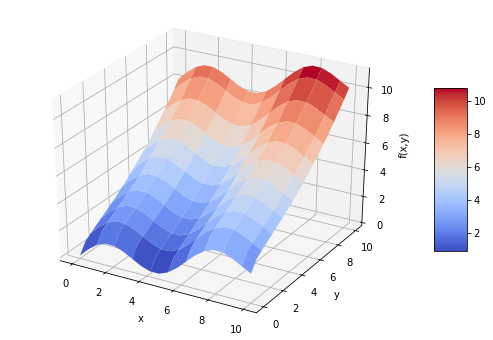

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,rstride=2, cstride=2,
                    cmap=mpl.cm.coolwarm,
                     antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5,aspect=5)

In [39]:
matrix=np.zeros((len(x), 6+1))
matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y**2
matrix[:,3] = x**2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] =1
import statsmodels.api as sm
model=sm.OLS(fm(x,y), matrix).fit()
model

In [40]:
model.rsquared

1.0

In [41]:
a= model.params
a

array([ 7.02216063e-15,  2.50000000e-01, -1.33226763e-15, -3.85108612e-16,
        5.00000000e-02,  1.00000000e+00,  1.00000000e+00])

In [44]:
#插值
import scipy.interpolate as spi
x=np.linspace(-2*np.pi, 2*np.pi,25)

def f(x):
    return np.sin(x)+0.5*x

Text(0, 0.5, 'f(x)')

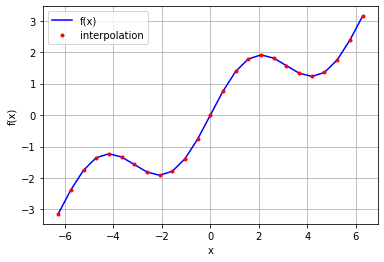

In [45]:
ipo = spi.splrep(x,f(x),k=1)
iy = spi.splev(x,ipo)
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,iy, 'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

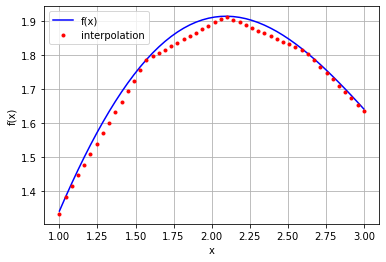

In [46]:
xd = np.linspace(1.0,3.0,50)
iyd=spi.splev(xd, ipo)

plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

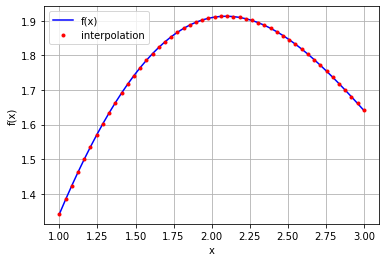

In [47]:
ipo = spi.splrep(x,f(x),k=3)
iyd = spi.splev(xd,ipo)
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [48]:
np.allclose(f(xd),iyd)

False

In [49]:
#不完美但是MSE很小
np.sum((f(xd) - iyd)**2)/len(xd)

1.1349319851436252e-08

凸优化

In [54]:
def fm(x,y):
    return (np.sin(x) + 0.05*x**2
           +np.sin(y) + 0.05*y**2)

x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)
Z=fm(X,Y)

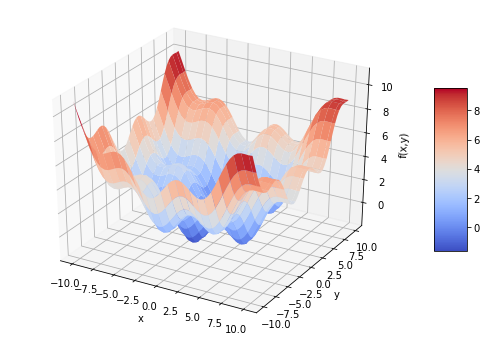

In [55]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z, rstride=2, cstride=2,
                    cmap = mpl.cm.coolwarm,
                    linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5,aspect=5)

In [60]:
import scipy.optimize as spo
#全局优化
def fo(x,y):
    z=np.sin(x)+0.05*x**2 +np.sin(y)+0.05*y**2
    if output==True:
        print('%8.4f %8.4f %8.4f' %(x,y,z))
    return z

In [63]:
output=False
opt1=spo.brute(fo((-10,10.1,5),(-10,10.1,5)),finish=None)
opt1

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [64]:
#局部优化
output=True
opt2=spo.fmin(fo,opt1, xto1=0.001, fto1=0.001, maxiter=15, maxfun=20)
opt2

NameError: name 'opt1' is not defined

In [68]:
#有约束优化
from math import sqrt
def Eu(s,b):
    return -(0.5*sqrt(s*15 +b*5)+0.5*sqrt(s*5+b*12))

cons=({'type':'ineq', 'fun':lambda s,b: 100 - s*10 - b*10})
bnds=((0,1000),(0,1000))

In [70]:
result =spo.minimize(Eu,[5,5],method='SLSQP',bounds=bnds, constraints=cons)
result

TypeError: <lambda>() missing 1 required positional argument: 'b'

积分

In [84]:
import scipy.integrate as sci
def f(x):
    return np.sin(x)+0.5*x

In [85]:
a= 0.5
b=9.5
x=np.linspace(0,10)
y=f(x)

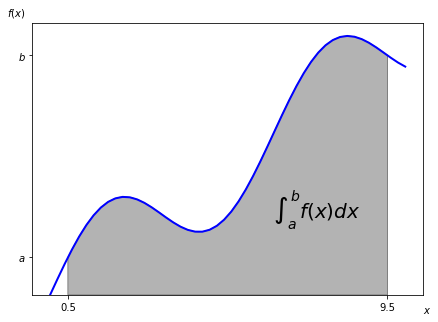

In [86]:
from matplotlib.patches import Polygon
fig,ax = plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)

#area under the function between the lower and upper limit
Ix = np.linspace(a,b)
Iy = f(Ix)
verts = [(a,0)] +list(zip(Ix,Iy))+[(b,0)]
poly = Polygon(verts, facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)

#labels
plt.text(0.75*(a+b),1.5,r"$\int_a^b f(x)dx$",
         horizontalalignment='center',fontsize=20)
plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')

ax.set_xticks((a,b))
ax.set_yticklabels(('$a$','$b$'))
ax.set_yticks([f(a),f(b)])

In [87]:
#数值积分-自适应求积
sci.quad(f,a,b)[0]

24.374754718086752

In [88]:
sci.fixed_quad(f,a,b)[0] #固定高斯求积

24.366995967084602

In [89]:
sci.romberg(f,a,b) #龙贝格求积

24.374754718086713

In [90]:
xi=np.linspace(0.5,9.5,25)
sci.trapz(f(xi),xi) #梯形法则

24.352733271544516

In [91]:
sci.simps(f(xi),xi)#Simpson法则

24.37496418455075

In [92]:
#通过模拟求积分
for i in range(1,20):
    np.random.seed(1000)
    x = np.random.random(i*10)*(b-a)+a
    print(np.sum(f(x)/len(x)*(b-a)))

24.80476227933147
26.522918898332378
26.26554751922396
26.027703399438238
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961203
23.672367460669882
23.67941041606289
24.424401707879312
24.239005346819056
24.115396924962802
24.42419198756673
23.924933080533783
24.194842120278743
24.117348378249833
24.10069092966227
23.76905109847816


符号计算

In [94]:
#基本知识
import sympy as sy
x=sy.Symbol('x')
y=sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [95]:
sy.sqrt(x)

sqrt(x)

In [96]:
3+sy.sqrt(x)-4**2

sqrt(x) - 13

In [97]:
f= x**2+3+0.5*x**2+3/2
sy.simplify(f)

1.5*x**2 + 4.5

In [98]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [99]:
print(sy.pretty(sy.sqrt(x)+0.5))

  ___      
\/ x  + 0.5


In [100]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [101]:
pi_str[-40:]

'8245672736856312185020980470362464176199'

In [102]:
pi_str.find('111272')

366713

In [103]:
#方程式
sy.solve(x**2-1)

[-1, 1]

In [105]:
sy.solve(x**2-1-3)

[-2, 2]

In [106]:
sy.solve(x**2-1-3)

[-2, 2]

In [107]:
sy.solve(x**3+0.5*x**2-1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [108]:
sy.solve(x**2+y**2)

[{x: -I*y}, {x: I*y}]

In [111]:
#积分
a,b = sy.symbols('a b')
print(sy.pretty(sy.Integral(sy.sin(x)+0.5*x,(x,a,b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [112]:
int_func=sy.integrate(sy.sin(x)+0.5*x,x)
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [113]:
Fb = int_func.subs(x,9.5).evalf()
Fa = int_func.subs(x,0.5).evalf()
Fb - Fa

24.3747547180867

In [114]:
int_func_limits=sy.integrate(sy.sin(x)+0.5*x,(x,a,b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [115]:
int_func_limits.subs({a:0.5,b:9.5}).evalf()

24.3747547180868

In [116]:
sy.integrate(sy.sin(x)+0.5*x,(x,0.5,9.5))

24.3747547180867

In [117]:
#微分
int_func.diff()

0.5*x + sin(x)

In [118]:
f = (sy.sin(x)+0.05*x**2
    +sy.sin(y)+0.05*y**2)
del_x = sy.diff(f,x)
del_x

0.1*x + cos(x)

In [119]:
del_y = sy.diff(f,y)
del_y

0.1*y + cos(y)

In [121]:
xo=sy.nsolve(del_x,-1.5)
xo

-1.42755177876459

In [123]:
yo = sy.nsolve(del_y,-1.5)
yo

-1.42755177876459

In [124]:
f.subs({x:xo, y:yo}).evalf()

-1.77572565314742

In [125]:
xo=sy.nsolve(del_x,1.5)
xo

1.74632928225285

In [126]:
yo=sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [127]:
f.subs({x:xo,y:yo}).evalf()

2.27423381055640